In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import plotly.plotly as py
import plotly.graph_objs as go


from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from scipy import stats

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
rtrain = pd.read_csv("/Users/kenmckee/Desktop/relaytrain.csv")
rtest = pd.read_csv("/Users/kenmckee/Desktop/relaytest.csv")

In [3]:
print(rtrain.head())

#sb.countplot(x='retained', data=rtrain, palette='hls')
print(rtrain['retained'].mean())
print(rtrain['avgorder'].describe())

#plt.plot(rtrain['avgorder'],rtrain['retained'])
#plt.show()



   Unnamed: 0  Unnamed: 0.1  X1  custid  retained   created firstorder  \
0           0             1   1  6H6T6N         0   9/28/12    8/11/13   
1           1             2   2  APCENR         1  12/19/10     4/1/11   
2           2             3   3  7UP6MS         0   10/3/10    12/1/10   
3           3             4   4  7ZEW8G         0  10/22/10    3/28/11   
4           4             5   5  8V726M         1  11/27/10   11/29/10   

  lastorder  esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  \
0   8/11/13     29  100.000000    3.448276     14.52  0.000000          0   
1   1/19/14     95   92.631579   10.526316     83.69  0.181641          1   
2    7/6/11      0    0.000000    0.000000     33.58  0.059908          0   
3   3/28/11      0    0.000000    0.000000     54.96  0.000000          0   
4   1/28/13     30   90.000000   13.333333    111.91  0.008850          0   

   refill  doorstep  train     favday city  
0       0         0      1     Monday  CHO  
1 

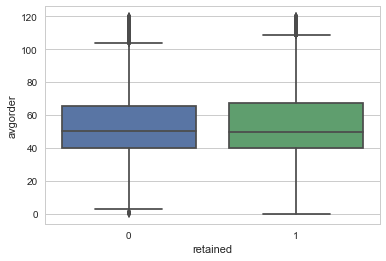

count    22982.000000
mean        54.582885
std         22.366155
min          0.000000
25%         40.020000
50%         49.990000
75%         67.000000
max        119.990000
Name: avgorder, dtype: float64
   custid  retained  esent   eopenrate  eclickrate  avgorder   ordfreq  \
0  6H6T6N         0     29  100.000000    3.448276     14.52  0.000000   
1  APCENR         1     95   92.631579   10.526316     83.69  0.181641   
2  7UP6MS         0      0    0.000000    0.000000     33.58  0.059908   
3  7ZEW8G         0      0    0.000000    0.000000     54.96  0.000000   
4  8V726M         1     30   90.000000   13.333333    111.91  0.008850   

   paperless  refill  doorstep  train city  
0          0       0         0      1  CHO  
1          1       1         1      1  CHO  
2          0       0         0      1  CHO  
3          0       0         0      1  RIC  
4          0       0         0      1  RIC  


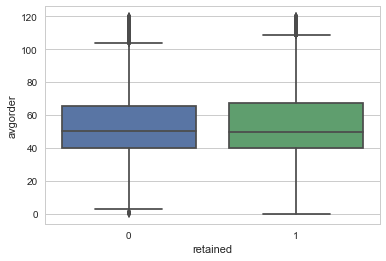

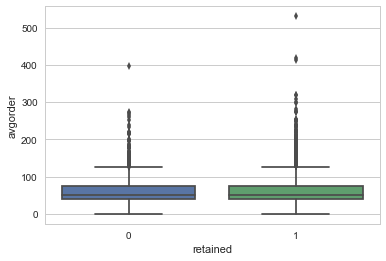

In [4]:




sb.boxplot(x='retained', y='avgorder', data=rtrain)
plt.show()

rtrainx = rtrain[rtrain.avgorder < 120]

#rtrainy = rtrainx[rtrainx['avgorder'] < retrainx]
print(rtrainx['avgorder'].describe())

cols = ["custid","retained","esent","eopenrate","eclickrate","avgorder","ordfreq","paperless","refill","doorstep","train","city"]
rtrainy = rtrainx[cols]
rtesty = rtest[cols]
print(rtrainy.head())

sb.boxplot(x='retained', y='avgorder', data=rtrainy)
plt.show()
sb.boxplot(x='retained', y='avgorder', data=rtesty)
plt.show()

In [5]:
data2 = pd.get_dummies(rtrainy, columns =["esent","eopenrate","eclickrate","avgorder","ordfreq","city"])
data2.head()



,custid,retained,paperless,refill,doorstep,train,esent_0,esent_1,esent_2,esent_3,...,ordfreq_0.5714285714285711,ordfreq_0.666666666666667,ordfreq_0.7647058823529409,ordfreq_0.875,ordfreq_1.0,ordfreq_2.0,city_BWI,city_CHO,city_DCX,city_RIC
0,QPRVDD,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,HUBE83,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,GW8AUL,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,WYSPZ7,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,ZLK255,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data2t = pd.get_dummies(rtesty, columns =["esent","eopenrate","eclickrate","avgorder","ordfreq","city"])
data2t.head()

,custid,retained,paperless,refill,doorstep,train,esent_0,esent_1,esent_2,esent_3,...,ordfreq_0.5714285714285711,ordfreq_0.666666666666667,ordfreq_0.7647058823529409,ordfreq_0.875,ordfreq_1.0,ordfreq_2.0,city_BWI,city_CHO,city_DCX,city_RIC
0,QPRVDD,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,HUBE83,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,GW8AUL,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,WYSPZ7,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,ZLK255,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


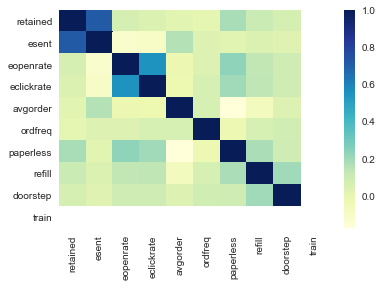

In [23]:
import seaborn as sns

sns.heatmap(rtrainy.corr(), cmap="YlGnBu")
plt.show()


#sb.heatmap(rtrainx.corr())





In [ ]:
data2.to_csv("/Users/kenmckee/Desktop/data2.csv")

In [20]:
x = data2['retained']
y = data2.drop(['retained','custid'], axis=1)

#print(y.head())
print(y.shape);

y.to_csv("/Users/kenmckee/Desktop/y.csv")

(22982, 11805)


In [21]:
print(x.shape);
x.head()


(22982,)


0    0
1    1
2    0
3    0
4    1
Name: retained, dtype: int64

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
#print(result.summary())

In [ ]:
#plt.figure(figsize=(12,8))
#plt.scatter(rtrainx.avgorder,rtrainx.paperless, c=rtrainx.retained, alpha=0.5)

#print(rtrainx.describe())
cols = ["paperless","refill","doorstep","train","orderfreq","esent"]
x = rtrainx[cols]
#print(x.head())
y = rtrainx['retained']

print(pd.crosstab(rtrainx['retained'], rtrainx['train'], rownames=['retained']))


In [ ]:
logit = sm.Logit(y,x)

# fit the model
result = logit.fit()
print(result.summary2())